In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [3]:
print("missing values in each column",dataset.isna().sum())

missing values in each column CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X=dataset.drop(['CustomerID'],axis=1)

In [6]:
bins=[0,40,70,100]
labels=['Low','Medium','High']
pd.crosstab(dataset['Gender'],pd.cut(dataset['Spending Score (1-100)'],bins=bins,labels=labels))
        

Spending Score (1-100),Low,Medium,High
Gender,,,
Female,34,46,32
Male,29,37,22


In [9]:
X['Gender']=X['Gender'].map({'Male':0,'Female':1})
corr_matrix=X.corr(numeric_only=True)
print(corr_matrix)

                        Gender       Age  Annual Income (k$)  \
Gender                     NaN       NaN                 NaN   
Age                        NaN  1.000000           -0.012398   
Annual Income (k$)         NaN -0.012398            1.000000   
Spending Score (1-100)     NaN -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                                     NaN  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [10]:
X.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [11]:
X=X.iloc[:,[2,3]].values

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\c

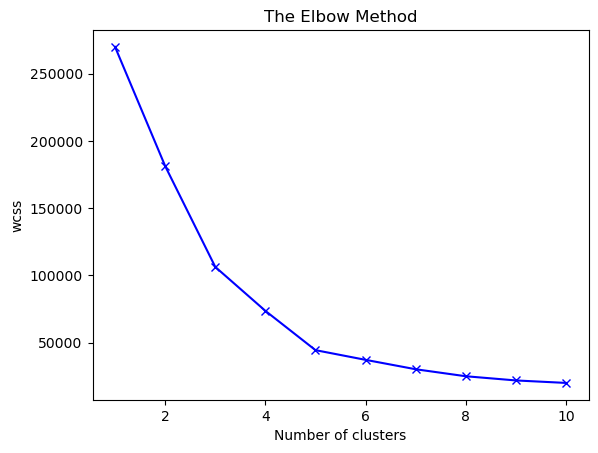

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
kmeans=KMeans(n_clusters=5,init='k-means++',n_init=10,random_state=42)
y_kmeans=kmeans.fit_predict(X)

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


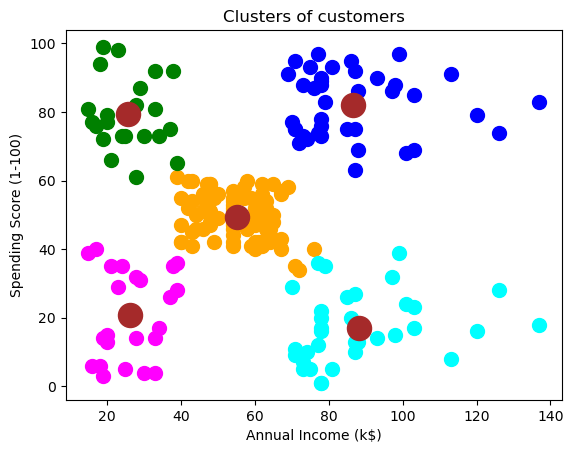

In [35]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='orange',label='cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='brown',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,y_kmeans)
print(f'silhoutte score for k=5: {score:.2f}')

silhoutte score for k=5: 0.55


In [36]:
new_labels=kmeans.predict([[15,39]])
new_labels

array([4])